In [7]:
#
import pandas as pd
import numpy as np
data = {
    'Product': ['Widget A', 'Widget B', 'Widget C', 'Widget D', 'Widget E', 'Widget A', 'Widget B', 'Widget C', 'Widget D', 'Widget E'],
    'Region': ['North', 'South', 'East', 'West', 'North', 'South', 'East', 'West', 'North', 'South'],
    'Sales': [100, 150, np.nan, 200, 250, 300, np.nan, 350, 400, np.nan],
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10']
}
df = pd.DataFrame(data)
df.to_csv('sales_data.csv', index=False)
print("Sample 'sales_data.csv' file has been created.")

Sample 'sales_data.csv' file has been created.


Initial DataFrame:
    Product Region  Sales        Date
0  Widget A  North  100.0  2023-01-01
1  Widget B  South  150.0  2023-01-02
2  Widget C   East    NaN  2023-01-03
3  Widget D   West  200.0  2023-01-04
4  Widget E  North  250.0  2023-01-05

Cleaned DataFrame:
    Product Region  Sales       Date
0  Widget A  North  100.0 2023-01-01
1  Widget B  South  150.0 2023-01-02
2  Widget C   East  250.0 2023-01-03
3  Widget D   West  200.0 2023-01-04
4  Widget E  North  250.0 2023-01-05

Summary Statistics:
           Sales                 Date
count   10.00000                   10
mean   250.00000  2023-01-05 12:00:00
min    100.00000  2023-01-01 00:00:00
25%    212.50000  2023-01-03 06:00:00
50%    250.00000  2023-01-05 12:00:00
75%    287.50000  2023-01-07 18:00:00
max    400.00000  2023-01-10 00:00:00
std     88.19171                  NaN

Sales by Product and Region:
    Product Region  Sales
0  Widget A  North  100.0
1  Widget A  South  300.0
2  Widget B   East  250.0
3  Widget B  S

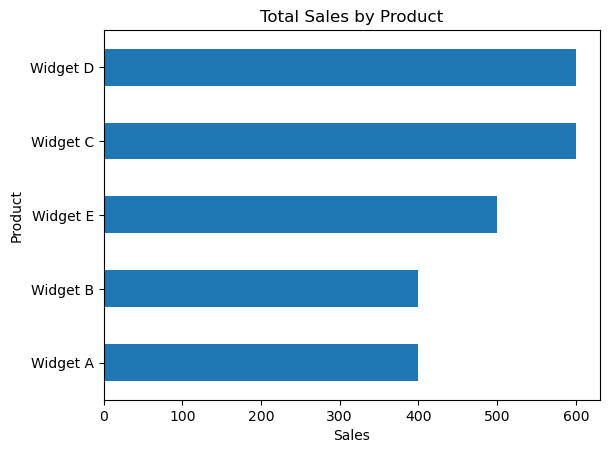

In [9]:
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('sales_data.csv')

print("Initial DataFrame:")
print(df.head())

df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df = df.dropna(subset=['Product'])

df['Date'] = pd.to_datetime(df['Date'])

df = df.drop_duplicates()

print("\nCleaned DataFrame:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

sales_by_product_region = df.groupby(['Product', 'Region'])['Sales'].sum().reset_index()
print("\nSales by Product and Region:")
print(sales_by_product_region)

best_selling_product = df.groupby('Product')['Sales'].sum().idxmax()
print(f"\nBest Selling Product: {best_selling_product}")

sales_by_product = df.groupby('Product')['Sales'].sum().sort_values()
sales_by_product.plot(kind='barh', title='Total Sales by Product')

plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()

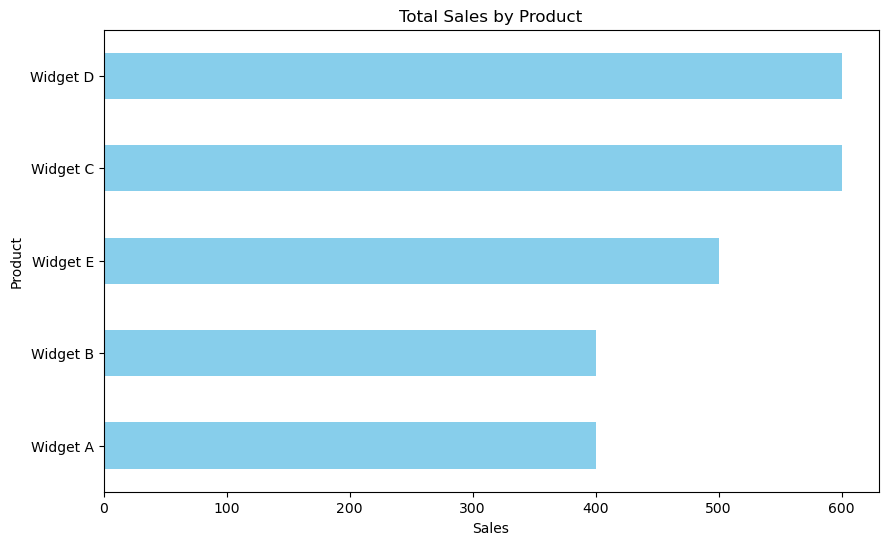

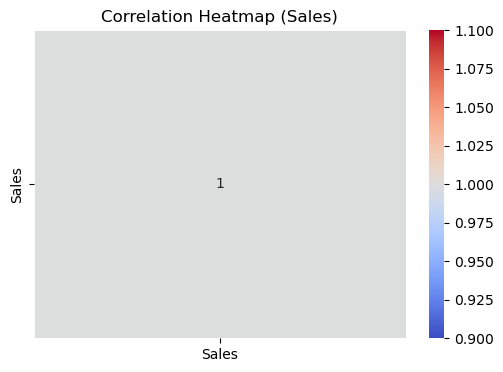

C:\Users\mp12y\AppData\Local\Temp\ipykernel_13520\2647366270.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Sales', data=df, palette='Set2')


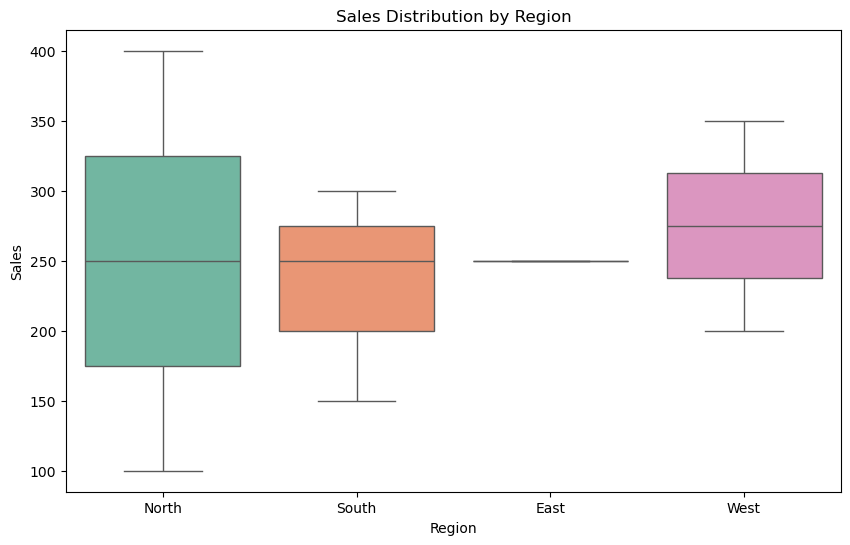

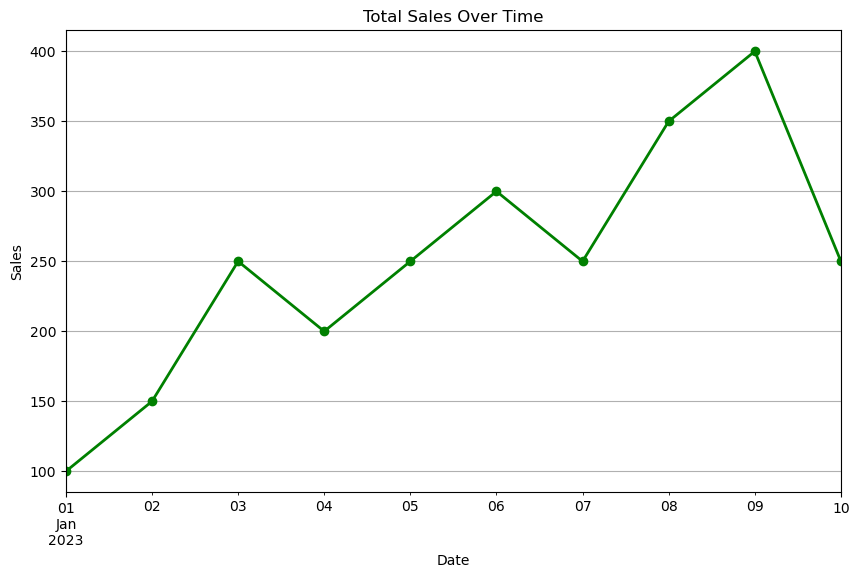

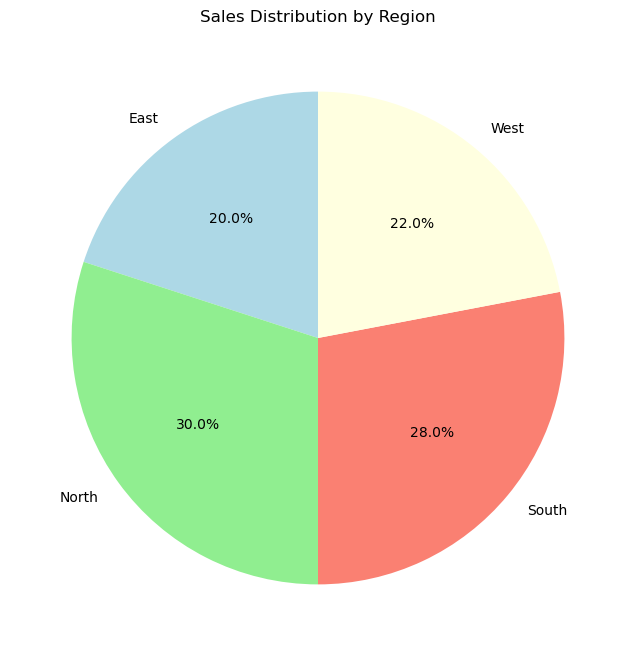

In [13]:
import seaborn as sns
df = pd.DataFrame(data)
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop_duplicates()
plt.figure(figsize=(10, 6))
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values()
sales_by_product.plot(kind='barh', color='skyblue', title='Total Sales by Product')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.show()

corr = df[['Sales']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Sales)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Region')
plt.show()

plt.figure(figsize=(10, 6))
df.groupby('Date')['Sales'].sum().plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 8))
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'salmon', 'lightyellow'])
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

<Axes: title={'center': 'Total Sales by Product'}, ylabel='Product'>

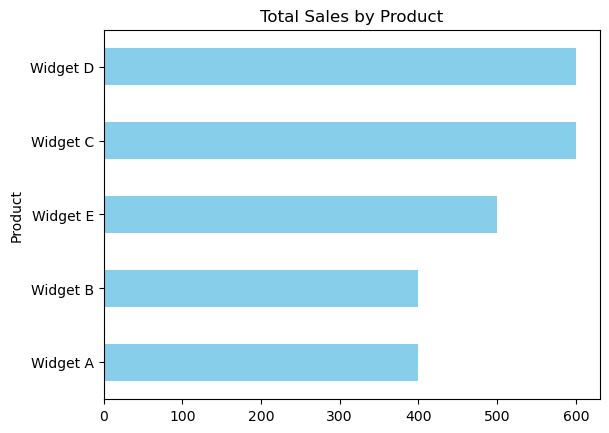

In [15]:
sales_by_product = df.groupby('Product')['Sales'].sum().sort_values()
sales_by_product.plot(kind='barh', color='skyblue', title='Total Sales by Product')